In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Train set.csv")
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,9/06/2019,Kolkata,Banglore,CCU → BLR,14:25,16:55,2h 30m,non-stop,No info,5644
1,Vistara,6/03/2019,Mumbai,Hyderabad,BOM → DEL → HYD,08:45,09:25 07 Mar,24h 40m,1 stop,No info,12395
2,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,06:05,08:50,2h 45m,non-stop,No info,4077
3,Vistara,12/06/2019,Kolkata,Banglore,CCU → DEL → BLR,17:00,23:25,6h 25m,1 stop,No info,8610
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067
5,IndiGo,18/03/2019,Chennai,Kolkata,MAA → CCU,19:35,21:55,2h 20m,non-stop,No info,4332
6,Jet Airways,15/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,04:40 16 May,8h 40m,1 stop,No info,13941
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,00:45 03 Mar,25h 55m,1 stop,No info,26890
8,Multiple carriers,12/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,01:30 13 Jun,12h 30m,1 stop,No info,13377
9,IndiGo,6/05/2019,Delhi,Cochin,DEL → BOM → COK,10:35,01:30 07 May,14h 55m,1 stop,No info,6979


In [3]:
df.shape

(8012, 11)

In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Date_of_Journey  should be converted to Date data type
### Arrival Time has month in the values when it should be just time
### Additional info looks unneccessary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8012 non-null   object
 1   Date_of_Journey  8012 non-null   object
 2   Source           8012 non-null   object
 3   Destination      8012 non-null   object
 4   Route            8011 non-null   object
 5   Dep_Time         8012 non-null   object
 6   Arrival_Time     8012 non-null   object
 7   Duration         8012 non-null   object
 8   Total_Stops      8011 non-null   object
 9   Additional_Info  8012 non-null   object
 10  Price            8012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 688.7+ KB


### Route & Total_Stops are 8011 non-null meaning there is one null value in each column.

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### There is in fact a null value in both columns 

In [7]:
df.duplicated().sum()

125

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(8011, 11)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### No more null values

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(7886, 11)

### Duplicated values have been dropped

In [14]:
df.describe()

,Price
count,7886.000000
mean,9048.862795
std,4581.736678
min,1759.000000
25%,5277.000000
50%,8293.000000
75%,12293.000000
max,79512.000000


In [15]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

C:\Users\mr-m-\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\mr-m-\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\mr-m-\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\mr-m-\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/03/2019' in DD/MM/YYYY format. Provide format or specif

In [16]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
df["Journey_day"] =pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y")

In [18]:
df["Journey_month"] =pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y")

In [19]:
#df['Date_of_Journey'] = df['Date_of_Journey'].dt.year

In [20]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_day        datetime64[ns]
Journey_month      datetime64[ns]
dtype: object

### Date of Journey is now of datetime64 data type
### We extracted the months and days from the Date of Journey column

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-09-06,Kolkata,Banglore,CCU → BLR,14:25,16:55,2h 30m,non-stop,No info,5644,2019-09-06,2019-09-06
1,Vistara,2019-06-03,Mumbai,Hyderabad,BOM → DEL → HYD,08:45,09:25 07 Mar,24h 40m,1 stop,No info,12395,2019-06-03,2019-06-03
2,IndiGo,2019-03-04,Banglore,Delhi,BLR → DEL,06:05,08:50,2h 45m,non-stop,No info,4077,2019-03-04,2019-03-04
3,Vistara,2019-12-06,Kolkata,Banglore,CCU → DEL → BLR,17:00,23:25,6h 25m,1 stop,No info,8610,2019-12-06,2019-12-06
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067,2019-01-03,2019-01-03


### We can now drop the Date of Journey column as it is of no use anymore

In [22]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Kolkata,Banglore,CCU → BLR,14:25,16:55,2h 30m,non-stop,No info,5644,2019-09-06,2019-09-06
1,Vistara,Mumbai,Hyderabad,BOM → DEL → HYD,08:45,09:25 07 Mar,24h 40m,1 stop,No info,12395,2019-06-03,2019-06-03
2,IndiGo,Banglore,Delhi,BLR → DEL,06:05,08:50,2h 45m,non-stop,No info,4077,2019-03-04,2019-03-04
3,Vistara,Kolkata,Banglore,CCU → DEL → BLR,17:00,23:25,6h 25m,1 stop,No info,8610,2019-12-06,2019-12-06
4,IndiGo,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067,2019-01-03,2019-01-03


### We can now extract the hours and minutes from Dep_Time column
### and then drop the Dep_Time column

In [24]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [25]:
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [26]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [27]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,2h 30m,non-stop,No info,5644,2019-09-06,2019-09-06,14,25
1,Vistara,Mumbai,Hyderabad,BOM → DEL → HYD,09:25 07 Mar,24h 40m,1 stop,No info,12395,2019-06-03,2019-06-03,8,45
2,IndiGo,Banglore,Delhi,BLR → DEL,08:50,2h 45m,non-stop,No info,4077,2019-03-04,2019-03-04,6,5
3,Vistara,Kolkata,Banglore,CCU → DEL → BLR,23:25,6h 25m,1 stop,No info,8610,2019-12-06,2019-12-06,17,0
4,IndiGo,Banglore,New Delhi,BLR → DEL,13:00,2h 55m,non-stop,No info,10067,2019-01-03,2019-01-03,10,5


### Now, we also extract hours and minutes from the Arrival_Time column
### and also drop it at last

In [28]:
df["Arr_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arr_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [29]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,5644,2019-09-06,2019-09-06,14,25,16,55
1,Vistara,Mumbai,Hyderabad,BOM → DEL → HYD,24h 40m,1 stop,No info,12395,2019-06-03,2019-06-03,8,45,9,25
2,IndiGo,Banglore,Delhi,BLR → DEL,2h 45m,non-stop,No info,4077,2019-03-04,2019-03-04,6,5,8,50
3,Vistara,Kolkata,Banglore,CCU → DEL → BLR,6h 25m,1 stop,No info,8610,2019-12-06,2019-12-06,17,0,23,25
4,IndiGo,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,10067,2019-01-03,2019-01-03,10,5,13,0


In [30]:
h = df['Duration'].str.extract('(\d+)h', expand=False).astype(float)*60
m = df['Duration'].str.extract('(\d+)m', expand=False).astype(float)

df['Duration_Minutes'] = h.add(m, fill_value=0).astype(int).astype(str)

In [41]:
#df=df.drop(['new','Duration'],axis=1)

In [ ]:
df.head()

### I extracted the Duration column as minutes and put it into a new column called Duration_Minutes
### then I dropped the Duration column

In [ ]:
df['Airline'].value_counts()

In [ ]:
sns.set()
sns.catplot(y= "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

### Jet Airways Business has the highest prices.

In [ ]:
df['Source'].value_counts()

In [ ]:
sns.catplot(y= "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 6, aspect = 3)
plt.show()

Im not entirely sure but i think that Bangalore has the most outliers

In [32]:
df['Destination'].value_counts()

Cochin       3309
Banglore     2167
Delhi         928
New Delhi     699
Hyderabad     510
Kolkata       273
Name: Destination, dtype: int64

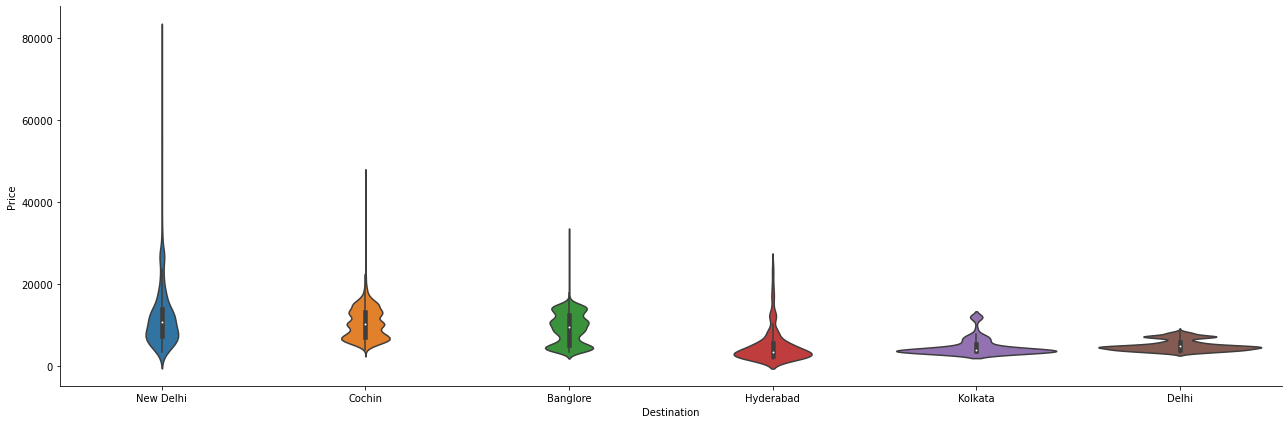

In [33]:
sns.catplot(y= "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="violin", height = 6, aspect = 3)
plt.show()

### The Route and Total_Stops columns give us the same info so we will drop the Route column

In [34]:
df.drop(['Route'],axis=1,inplace=True)

In [35]:
df['Additional_Info'].value_counts()

No info                         6152
In-flight meal not included     1455
No check-in baggage included     249
1 Long layover                    17
Change airports                    5
No Info                            3
Business class                     2
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

### Most of the Additional_Info column has no info and the other values do not correlate to the price of tickets so we will also drop this column

In [36]:
df.drop(['Additional_Info'],axis=1,inplace=True)

In [37]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Minutes
0,IndiGo,Kolkata,Banglore,2h 30m,non-stop,5644,2019-09-06,2019-09-06,14,25,16,55,150
1,Vistara,Mumbai,Hyderabad,24h 40m,1 stop,12395,2019-06-03,2019-06-03,8,45,9,25,1480
2,IndiGo,Banglore,Delhi,2h 45m,non-stop,4077,2019-03-04,2019-03-04,6,5,8,50,165
3,Vistara,Kolkata,Banglore,6h 25m,1 stop,8610,2019-12-06,2019-12-06,17,0,23,25,385
4,IndiGo,Banglore,New Delhi,2h 55m,non-stop,10067,2019-01-03,2019-01-03,10,5,13,0,175


In [38]:
df['Total_Stops'].value_counts()

1 stop      4271
non-stop    2567
2 stops     1015
3 stops       32
4 stops        1
Name: Total_Stops, dtype: int64

### We can replace the strings to integers by replacing these values to 1,0,2,3,4 respectively

In [39]:
df.replace({"non-stop":0, "1 stop": 1, "2 stops": 2, "3 stops":3, "4 stops": 4}, inplace=True)

In [40]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Minutes
0,IndiGo,Kolkata,Banglore,2h 30m,0,5644,2019-09-06,2019-09-06,14,25,16,55,150
1,Vistara,Mumbai,Hyderabad,24h 40m,1,12395,2019-06-03,2019-06-03,8,45,9,25,1480
2,IndiGo,Banglore,Delhi,2h 45m,0,4077,2019-03-04,2019-03-04,6,5,8,50,165
3,Vistara,Kolkata,Banglore,6h 25m,1,8610,2019-12-06,2019-12-06,17,0,23,25,385
4,IndiGo,Banglore,New Delhi,2h 55m,0,10067,2019-01-03,2019-01-03,10,5,13,0,175
